# Import

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load Dataset

In [79]:
df= pd.read_csv('Startups_data.csv')

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [81]:
df.isna()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


# Univariate Analysis

R&D Spend

In [82]:
df['R&D Spend'].describe()

count        50.000000
mean      73721.615600
std       45902.256482
min           0.000000
25%       39936.370000
50%       73051.080000
75%      101602.800000
max      165349.200000
Name: R&D Spend, dtype: float64

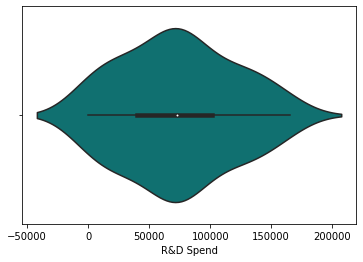

In [83]:
 sns.violinplot(df['R&D Spend'], color='teal')

Administration 

In [84]:
df['Administration'].describe()

count        50.000000
mean     121344.639600
std       28017.802755
min       51283.140000
25%      103730.875000
50%      122699.795000
75%      144842.180000
max      182645.560000
Name: Administration, dtype: float64

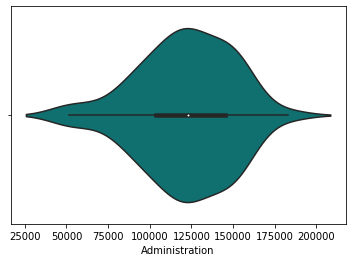

In [85]:
sns.violinplot(df['Administration'], color='teal')

Marketing Spend

In [86]:
df['Marketing Spend'].describe()

count        50.000000
mean     211025.097800
std      122290.310726
min           0.000000
25%      129300.132500
50%      212716.240000
75%      299469.085000
max      471784.100000
Name: Marketing Spend, dtype: float64

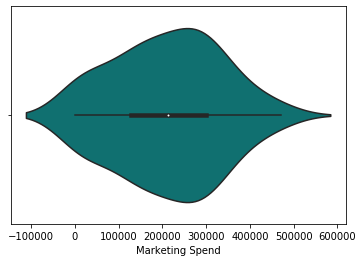

In [87]:
sns.violinplot(df['Marketing Spend'], color='Teal')

State 

In [88]:
df['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

Profit

In [89]:
df['Profit'].describe()

count        50.000000
mean     112012.639200
std       40306.180338
min       14681.400000
25%       90138.902500
50%      107978.190000
75%      139765.977500
max      192261.830000
Name: Profit, dtype: float64

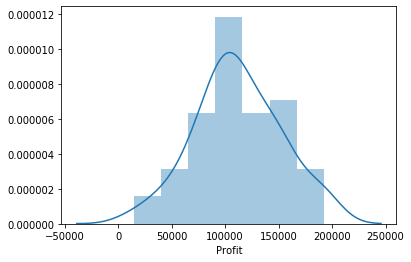

In [90]:
sns.distplot(df['Profit'])

# Bi Variate Analysis

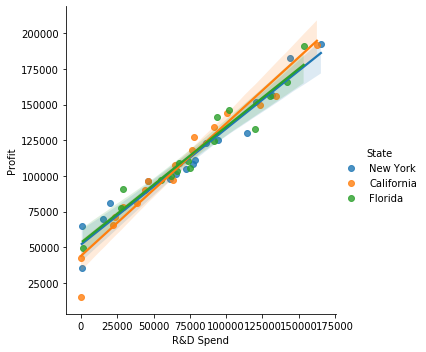

In [91]:
sns.lmplot(x= 'R&D Spend', y= 'Profit', data =df, hue='State')

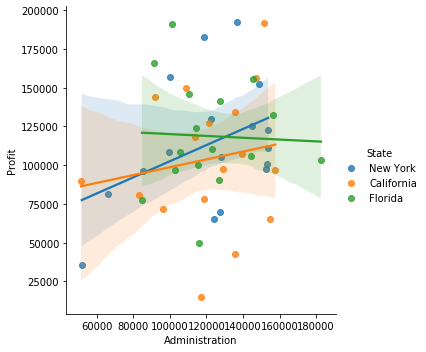

In [92]:
sns.lmplot(x= 'Administration', y= 'Profit', data =df, hue='State')

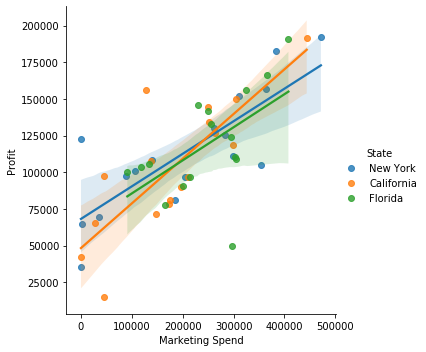

In [93]:
sns.lmplot(x= 'Marketing Spend', y= 'Profit', data =df, hue='State')

# Feature Engineering

In [94]:
df1= pd.DataFrame(df)
df1= df1.drop(columns= ['State'])

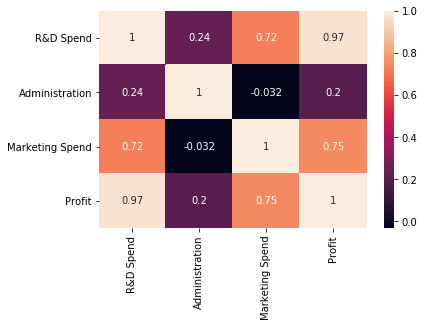

In [95]:
sns.heatmap(df1.corr(), annot=True)

# One-hot-Encoding

In [96]:
df= pd.get_dummies(df)

In [97]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'State_California', 'State_Florida', 'State_New York'],
      dtype='object')

# Train Test Split

In [98]:
X= df.drop(columns= ['Profit'])
y= df['Profit']

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=0)

# Model

In [100]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [101]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [102]:
y_pred= model.predict(X_test)

# Test Results

In [103]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

MSE

In [104]:
mse = mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error : {mse:f}")

Mean Squared Error : 83502864.032578


MAE

In [105]:
mae = mean_absolute_error(y_test,y_pred)
print(f"Mean Absolute Error : {mae:f}")

Mean Absolute Error : 7514.293660


R2 Score

In [106]:
r2score = r2_score(y_test,y_pred)
print(f"R2 Score: {r2score:f}")

R2 Score: 0.934707


# Using Backward Elimination for building optimal model

In [107]:
import statsmodels.api as sm
X = np.append(arr = np.ones((50, 1)).astype(int), values = X, axis = 1)
X_opt = X[:, [0, 1, 2, 3, 4, 5]]
X_opt = X_opt.astype(np.float64)
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()
X_opt = X[:, [0, 1, 3, 4, 5]]
X_opt = X_opt.astype(np.float64)
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()
X_opt = X[:, [0, 3, 4, 5]]
X_opt = X_opt.astype(np.float64)
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()
X_opt = X[:, [0, 3, 5]]
X_opt = X_opt.astype(np.float64)
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()
X_opt = X[:, [0, 3]]
X_opt = X_opt.astype(np.float64)
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Fri, 31 Jul 2020   Prob (F-statistic):           4.38e-10
Time:                        23:38:23   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const           6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
x1             0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""